In [1]:
# Loading the packages we need to start this project
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import _matplotlib
from scipy import stats
plt.style.use("ggplot")
import warnings
warnings.filterwarnings("ignore")

In [2]:
# We are now ready to import data
breast = pd.read_csv('C:/Users/Delmafia91/Downloads/breast_cancer.csv')

In [3]:
# Look at the head data
breast.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
breast.shape

(569, 32)

In [5]:
breast.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [26]:
# We could divide the data set in two, and have one part be a feature or multiple ones. In this, we are going to set X to be the worst. For instance, radius_worst, area_worst etc. One of the reason to divide your data concerning this type of information, is not to allow information coming in more than once. If I have two measurements coming in the model, it might overpower the other measurements because it appear more than once 
X = breast[['radius_worst','texture_worst', 'perimeter_worst',
'area_worst', 'smoothness_worst']]

# We are going to have the diagonis for our dependent variable to see if it will be benign or malign
y = breast['diagnosis']
print(X.head())
print(y.head())

   radius_worst  texture_worst  perimeter_worst  area_worst  smoothness_worst
0         25.38          17.33           184.60      2019.0            0.1622
1         24.99          23.41           158.80      1956.0            0.1238
2         23.57          25.53           152.50      1709.0            0.1444
3         14.91          26.50            98.87       567.7            0.2098
4         22.54          16.67           152.20      1575.0            0.1374
0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object


In [6]:
# Checking for null values
breast.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

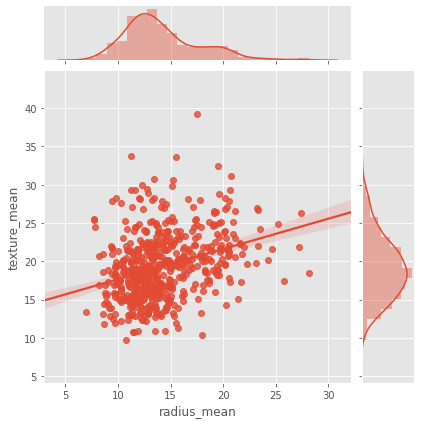

In [8]:
# Let us take a quick look at a plot of the first two columns we are interested in. Seaborn makes it very easy to look at the data with histogram and scatte plot, which I think is great
sns.jointplot('radius_mean', 'texture_mean', kind = "regg", data = breast)

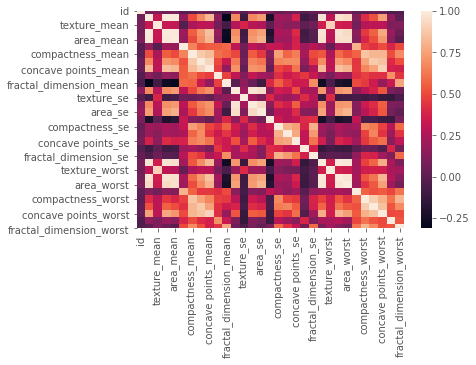

In [9]:
# Seaborn also has a heat map, which is basically colored graph. We are going to use all the features of the data set. If we take a look at the diagnol, it is all white because you are measure features on the same features. But is you look closely, you can also see some features to others, give a white color. Looking at 'ID', you we can see there is not one feature that lightens up except for 'ID'. Everything else is dark color. As Data scientist, we can see that we cannot solve this with just one feature. It needs to be all the features or most of them for us to come up with a solution for it.
sns.heatmap(breast.corr())

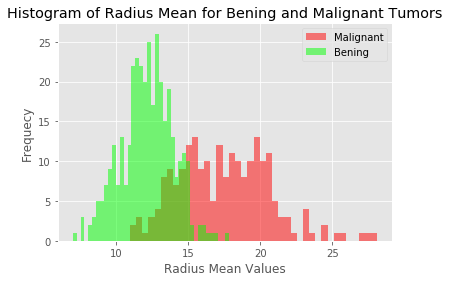

Most frequent malignant radius means is:  15.239999999999998


In [10]:
mal = plt.hist(breast[breast["diagnosis"] == "M"].radius_mean, bins=40, fc= (1, 0, 0, 0.5), label = "Malignant")
ben = plt.hist(breast[breast["diagnosis"] == "B"].radius_mean, bins = 40, fc = (0,1,0,0.5), label = "Bening")
plt.legend()
plt.xlabel("Radius Mean Values")
plt.ylabel("Frequecy")
plt.title("Histogram of Radius Mean for Bening and Malignant Tumors")
plt.show()
frequent_malignant_radius_mean = mal[0].max()
index_frequent_malignant_radius_mean = list(mal[0]).index(frequent_malignant_radius_mean)
mostfrequentmalradiusmean = mal[1][index_frequent_malignant_radius_mean]
print("Most frequent malignant radius means is: ", mostfrequentmalradiusmean)

In [11]:
breast_ben = breast[breast["diagnosis"] == "B"]
breast_mal = breast[breast["diagnosis"] == "M"]
desc = breast_ben.radius_mean.describe()
q1 = desc[4]
q3 = desc[6]
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
print("Anything outside this range is an outlier: (", lower_bound ,",", upper_bound,")")
breast_ben[breast_ben.radius_mean < lower_bound].radius_mean
print("Outliers: ",breast_ben[(breast_ben.radius_mean < lower_bound) | (breast_ben.radius_mean > upper_bound)].radius_mean.values)

Anything outside this range is an outlier: ( 7.645000000000001 , 16.805 )
Outliers:  [ 6.981 16.84  17.85 ]


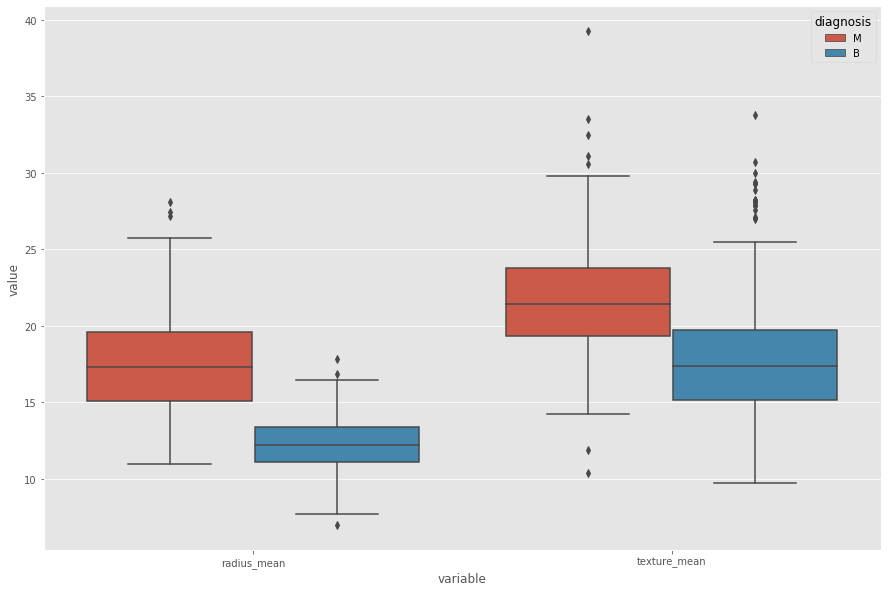

In [12]:
breast_melted = pd.melt(breast, id_vars = "diagnosis", value_vars = ['radius_mean', 'texture_mean'])
plt.figure(figsize = (15, 10))
sns.boxplot(x = "variable", y = "value", hue = "diagnosis", data = breast_melted)
plt.show()

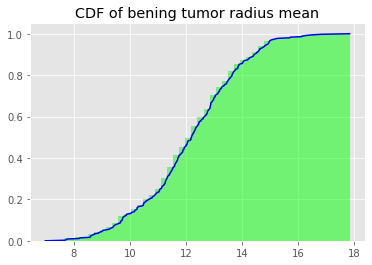

In [14]:
plt.hist(breast_ben.radius_mean, bins = 50, fc = (0,1,0,0.5), 
        label = 'Bening', normed = True, cumulative = True)
breast_sort = np.sort(breast_ben.radius_mean)
y = np.arange(len(breast_sort))/float(len(breast_sort) - 1)
plt.plot(breast_sort, y, color = 'blue')
plt.title('CDF of bening tumor radius mean')
plt.show()

In [15]:
mean_diff = breast_mal.radius_mean.mean() - breast_ben.radius_mean.mean()
var_ben = breast_ben.radius_mean.var()
var_mal = breast_mal.radius_mean.var()
var_pooled = (len(breast_ben)*var_ben + len(breast_mal)*var_mal) / float(len(breast_ben) + len(breast_mal))
effect_size = mean_diff/np.sqrt(var_pooled)
print("Effect size: ", effect_size)

Effect size:  2.2048585165041428


<Figure size 1080x720 with 0 Axes>

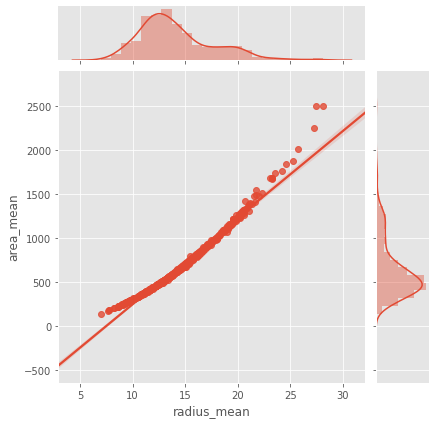

In [16]:
plt.figure(figsize = (15, 10))
sns.jointplot(breast.radius_mean, breast.area_mean, kind = "regg")
plt.show()

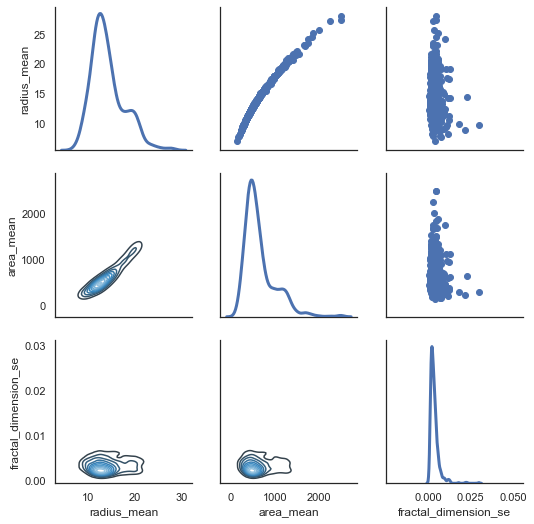

In [17]:
sns.set(style = "white")
df = breast.loc[:, ["radius_mean", "area_mean", "fractal_dimension_se"]]
g = sns.PairGrid(df, diag_sharey = False)
g.map_lower(sns.kdeplot, cmap = "Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw = 3)
plt.show()

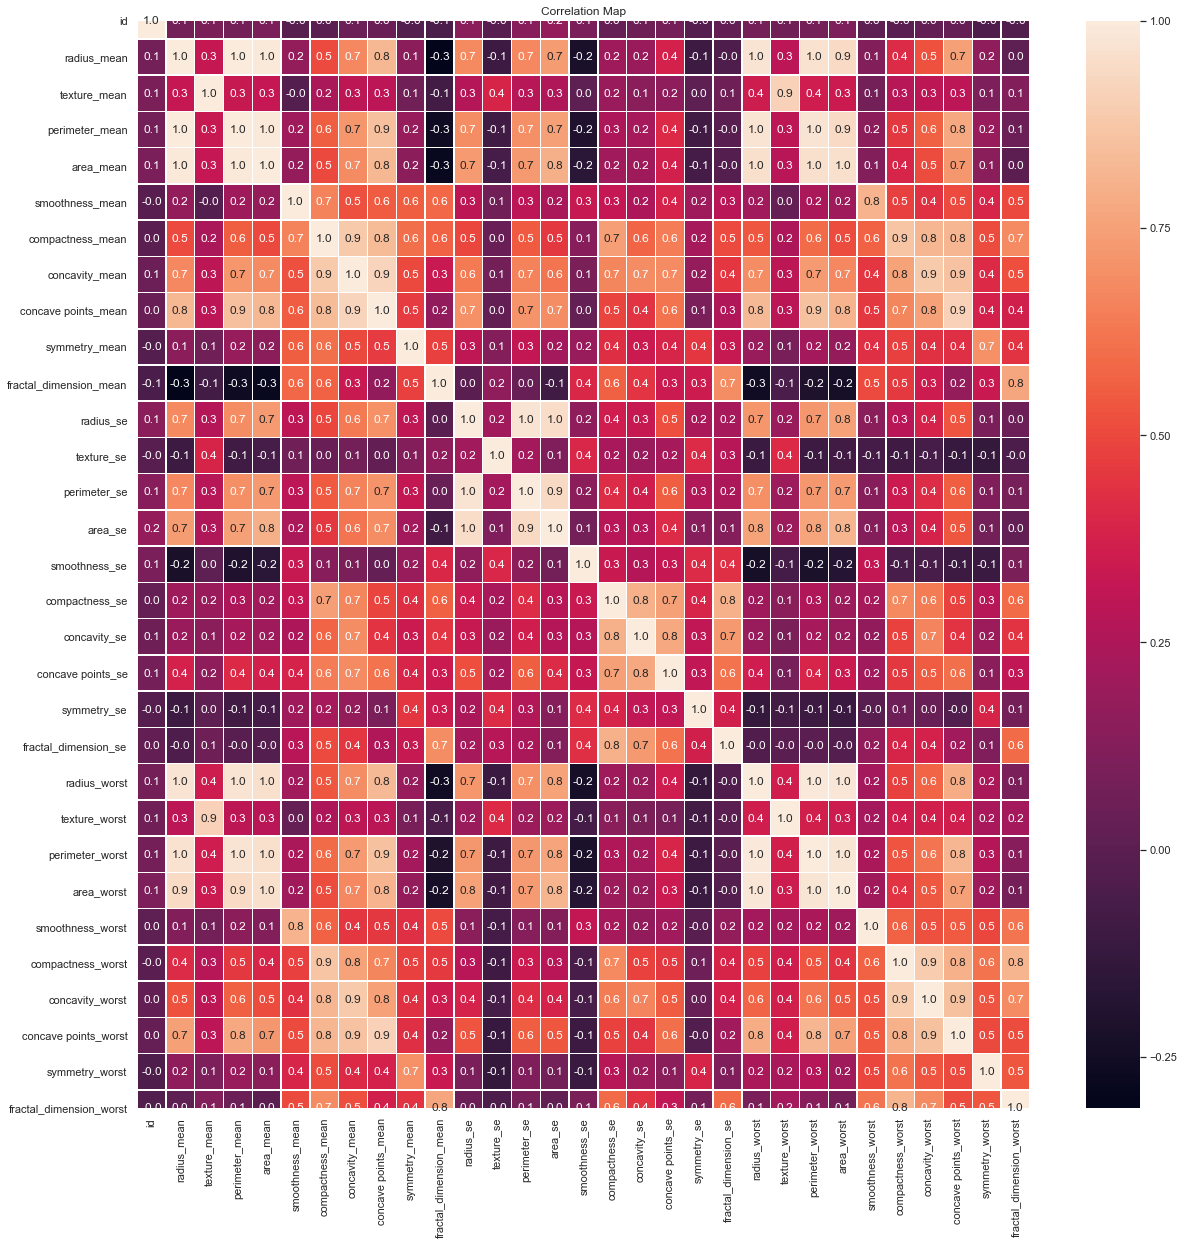

In [18]:
b, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(breast.corr(), annot = True, linewidth = 0.5, fmt = ".1f", ax = ax)
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.title('Correlation Map')
plt.savefig('graph.png')
plt.show()

In [19]:
np.cov(breast.radius_mean, breast.area_mean)
print("Covariance between radius mean and area mean: ", breast.radius_mean.cov(breast.area_mean))
print("Covariance between radius mean and fractal dimension se: ", breast.radius_mean.cov(breast.fractal_dimension_se))

Covariance between radius mean and area mean:  1224.4834093464565
Covariance between radius mean and fractal dimension se:  -0.0003976248576440626


In [21]:
p0 = breast.loc[:, ["area_mean", "radius_mean"]].corr(method = "pearson")
p01 = breast.radius_mean.cov(breast.area_mean)/(breast.radius_mean.std()*breast.area_mean.std())
print('Pearson Correlation: ')
print(p0)
print('Pearson Correlation: ', p01)

Pearson Correlation: 
             area_mean  radius_mean
area_mean     1.000000     0.987357
radius_mean   0.987357     1.000000
Pearson Correlation:  0.9873571700566128


In [22]:
breast_rank = breast.rank()
spearman_corr = breast_rank.loc[:, ["area_mean", "radius_mean"]].corr(method = "pearson")
print("Spearman's correlation: ")
print(spearman_corr)

Spearman's correlation: 
             area_mean  radius_mean
area_mean     1.000000     0.999602
radius_mean   0.999602     1.000000


In [23]:
statistic, p_value = stats.ttest_rel(breast.radius_mean, breast.area_mean)
print('p-value: ',  p_value)

p-value:  1.5253492492559045e-184


# Now it is time to do some machine learning logistic regression

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [28]:
# Now we get to the actual logistics part where we get to create our regression model 
from sklearn.linear_model import LogisticRegression
breastModel = LogisticRegression()
breastModel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
# We need to go ahead and test out our model to see if it is working. We are going to create a predict variable to predict the model. Then we print the predicted variable.
y_pred = breastModel.predict(X_test)
print(y_pred)
# We see that the predicted variable works because it spits out an answer as to what is malign or benign

['B' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B'
 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'B' 'B'
 'M' 'B' 'M' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'M' 'M' 'M'
 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'M' 'B'
 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'M'
 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'B'
 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'B'
 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'B']


In [30]:
# Notice that we know the predicted value of the model works, but we do not know how well it works. To know this, we need to decide how good the model is doing by comparing to the actual test data
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.93      0.94      0.93       105
           M       0.91      0.88      0.89        66

    accuracy                           0.92       171
   macro avg       0.92      0.91      0.91       171
weighted avg       0.92      0.92      0.92       171



In [31]:
# By looking at the result from the classification_report, we see these numbers that tell us that we are not far from the actual test data. The precision > 90 which is not too bad, because we know that the best result we can count on should be >= 95%. Basically, this would be rated as '*''. If it were above 95% precision, it would be '***'

In [32]:
# Let us look at the precision using the classification report
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[99  6]
 [ 8 58]]
